# **1. 주택 임대료 예측 데이터셋**
<a href="https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data?select=House_Rent_Dataset.csv">House Rent Prediction Dataset</a>은 주택 임대료를 예측하기 위한 목적으로 사용되는 데이터셋입니다. 이 데이터셋은 주로 머신러닝 및 데이터 분석 프로젝트에서 사용되며, 주택의 다양한 특성과 위치 정보를 기반으로 임대료를 예측하는 모델을 학습하는 데 활용됩니다.

# **2. 데이터셋 컬럼**
* BHK: 주택에 포함된 침실, 거실, 주방의 총 개수를 의미합니다.
* Rent: 주택(아파트/플랫)의 월 임대료를 나타냅니다.
* Size: 주택(아파트/플랫)의 면적을 평방피트(Square Feet)로 나타냅니다.
* Floor: 주택이 위치한 층수와 건물의 총 층수를 나타냅니다. (예: 2층 중 1층, 5층 중 3층 등)
* Area Type: 주택의 면적이 어떤 방식으로 계산되었는지를 나타냅니다. (예: 전체 면적, 실사용 면적, 건축 면적 등)
* Area Locality: 주택(아파트/플랫)이 위치한 구체적인 지역이나 동네 정보를 나타냅니다.
* City: 주택(아파트/플랫)이 위치한 도시를 나타냅니다.
* Furnishing Status: 주택이 가구가 완비되었는지(Furnished), 부분적으로 갖추어졌는지(Semi-Furnished), 아니면 비어 있는지(Unfurnished)를 나타냅니다.
* Tenant Preferred: 집주인 또는 중개인이 선호하는 임차인 유형을 나타냅니다. (예: 가족, 싱글, 직장인 등)
* Bathroom: 주택에 있는 욕실의 개수를 나타냅니다.
* Point of Contact: 주택(아파트/플랫)에 대한 추가 정보를 얻기 위해 연락해야 할 담당자나 중개인의 정보를 나타냅니다.

# **3. 데이터셋 전처리**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
rent_df = pd.read_csv('/content/drive/MyDrive/11. 데이터분석/data/House_Rent_Dataset.csv')
rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [8]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [9]:
rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
round(rent_df.describe(), 2) # round() <- 반올림 메서드 (2자리 수 노출)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


In [12]:
rent_df['BHK']

,BHK
0,2
1,2
2,2
3,2
4,2
...,...
4741,2
4742,3
4743,3
4744,3


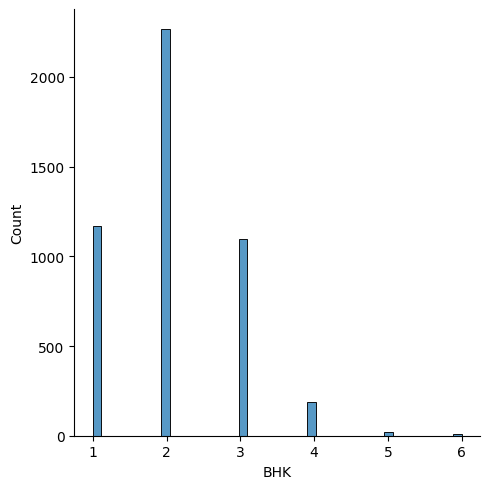

In [13]:
sns.displot(rent_df['BHK'])

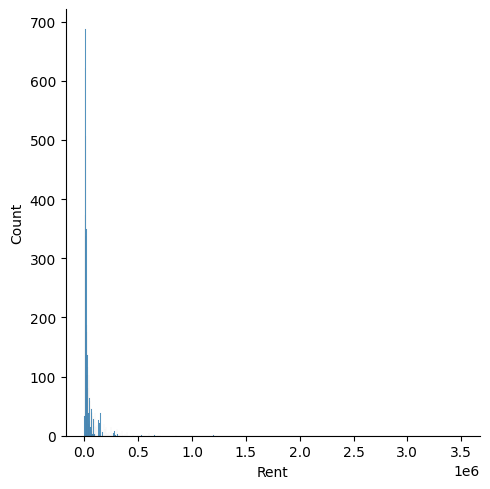

In [14]:
sns.displot(rent_df['Rent'])

In [15]:
rent_df['Rent'].sort_values()

,Rent
4076,1200
285,1500
471,1800
2475,2000
146,2200
...,...
1459,700000
1329,850000
827,1000000
1001,1200000


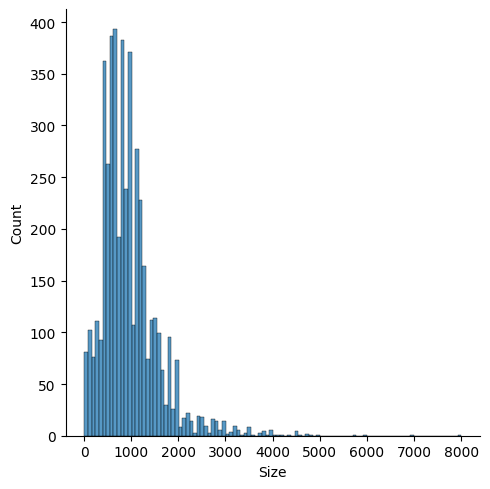

In [16]:
sns.displot(rent_df['Size'])

### boxplot

Boxplot은 데이터의 중앙값, 사분위수, 이상치 등을 시각적으로 표현하는 통계 그래프입니다. 주로 데이터 분포와 이상치를 빠르게 파악하기 위해 사용됩니다.

1. 중앙값 (Median, Q2): 데이터를 크기 순으로 정렬했을 때 중간에 위치한 값

2. Q1 (제1사분위수, 25%): 하위 25%에 해당하는 값

3. Q3 (제3사분위수, 75%): 상위 25%에 해당하는 값

4. IQR (Interquartile Range, 사분위 범위): Q3 - Q1, IQR은 데이터의 중간 50% 범위를 의미합니다.

5. Minimum: Q1 − 1.5 × IQR 이하에 속하지 않는 가장 작은 값

6. Maximum: Q3 + 1.5 × IQR 이하에 속하지 않는 가장 큰 값

7. 이상치: 일반적인 데이터 분포를 벗어난 값(Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR)

( IQR 기준으로 이상치를 정의하기 때문에 모든 상황에 완벽하지 않을 수 있습니다)

<Axes: ylabel='Rent'>

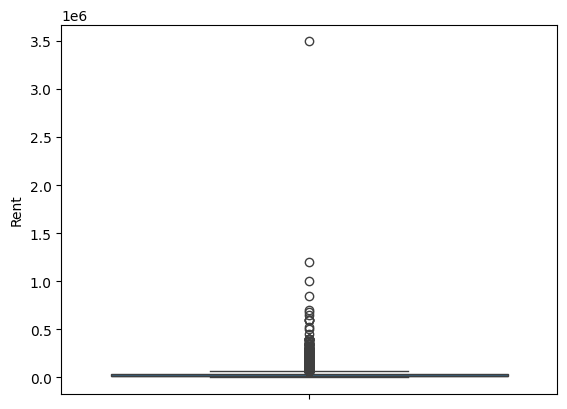

In [18]:
sns.boxplot(rent_df['Rent'])

<Axes: ylabel='Size'>

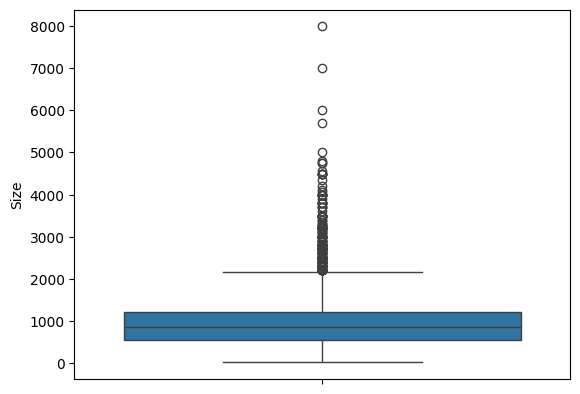

In [19]:
sns.boxplot(rent_df['Size'])

<Axes: ylabel='BHK'>

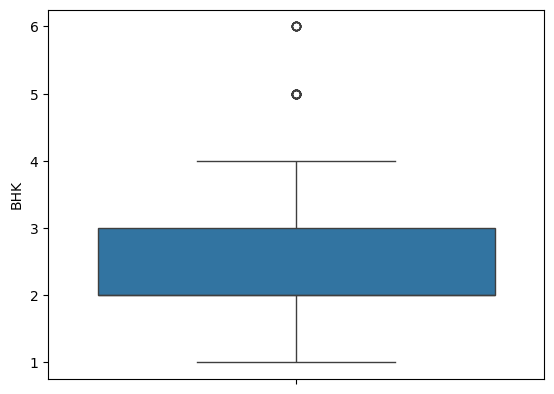

In [20]:
sns.boxplot(rent_df['BHK'])

In [21]:
rent_df.isna().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [22]:
rent_df.isna().mean()

,0
Posted On,0.0
BHK,0.0
Rent,0.0
Size,0.0
Floor,0.0
Area Type,0.0
Area Locality,0.0
City,0.0
Furnishing Status,0.0
Tenant Preferred,0.0


In [23]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [24]:
rent_df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [25]:
rent_df['Area Type'].nunique()

3

In [26]:
for i in ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    print(i, rent_df[i].nunique())

Floor 480
Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [33]:
rent_df = pd.get_dummies(rent_df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_df.head()

KeyError: "None of [Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',\n       'Point of Contact'],\n      dtype='object')] are in the [columns]"

In [32]:
X = rent_df.drop('Rent', axis=1) # 독립변수
y = rent_df['Rent'] # 종속변수

In [34]:
X.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,800,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,1000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,800,1,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,850,1,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [35]:
y.head()

,Rent
0,10000
1,20000
2,17000
3,10000
4,7500


In [36]:
from sklearn.model_selection import train_test_splfit

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

In [45]:
y_train.shape, y_test.shape

((3322,), (1424,))

In [46]:
X_train.shape, X_test.shape

((3322, 21), (1424, 21))

# **4. 알고리즘으로 모델링**
※ 사이킷런의 선형 회귀 학습 방법

사이킷런의 LinearRegression은 최소 제곱법(Ordinary Least Squares, OLS)을 기반으로 학습하며, 입력 데이터와 실제 목표값 사이의 잔차(Residual)의 제곱합을 최소화하는 방식으로 최적의 가중치(Weight)와 절편(Bias)를 구합니다. 내부적으로는 수치적으로 더 안정적인 특이값 분해(Singular Value Decomposition, SVD)를 사용하여 계산됩니다. 이 방식은 데이터셋이 비교적 작고 특성 수가 적당할 때 효율적입니다.



※ 최소 제곱법

최소 제곱법(Least Squares Method)은 주어진 데이터 포인트들과 예측 모델(주로 직선) 사이의 오차(Residuals)의 제곱합(Sum of Squared Errors, SSE)을 최소화하여 최적의 예측 모델을 찾아내는 통계적 방법입니다. 이 방법은 선형 회귀 분석에서 가장 널리 사용되며, 데이터 포인트들이 회귀선(Regression Line)에 최대한 가깝도록 조정합니다. 수학적으로는 오차의 제곱합을 최소화하는 기울기(w)와 절편(b)을 계산하여 모델을 최적화합니다.



※ 닫힌 해(Closed-form Solution)



In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [53]:
print(mean_squared_error(y_test,pred))
print(root_mean_squared_error(y_test,pred))

1845945611.7086728
42964.46917755034


In [54]:
X_train.loc[1837]

,1837
BHK,3
Size,2500
Bathroom,3
Area Type_Built Area,False
Area Type_Carpet Area,True
Area Type_Super Area,False
City_Bangalore,True
City_Chennai,False
City_Delhi,False
City_Hyderabad,False


In [55]:
y_train.loc[1837]

np.int64(3500000)

In [56]:
X_train.drop(1837, inplace=True)
y_train.drop(1837, inplace=True)

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
new_pred = lr.predict(X_test)
root_mean_squared_error(y_test, new_pred)

42987.37959096641

In [58]:
# 1837번을 삭제하기 전 RMSE : 42964.46917755034
# 1837번을 삭제한 후 RMSE : 42987.37959096641
42964.46917755034 - 42987.37959096641

-22.910413416073425

# **5. 로그 변환으로 RMSE 개선**
주택 임대료 데이터셋은 오른쪽으로 치우친 분포를 가지고 있습니다. 값이 큰 임대료(Outliers)가 평균과 모델 예측 결과에 큰 영향을 미치기 때문에 로그 변환을 통해 값의 범위를 축소하고, 분포를 정규 분포(Normal Distribution)에 가깝게 만듭니다. 로그 변환은 극단적으로 높은 값의 영향을 줄여주기 때문에 모델이 이상치에 덜 민감하게 반응하고 RMSE가 감소할 수 있습니다.



### ※ 정규 분포

정규 분포(Normal Distribution)는 데이터가 평균을 중심으로 좌우 대칭을 이루며 종 모양(Bell Curve)으로 퍼져 있는 통계적 분포입니다. 대부분의 값은 평균 근처에 몰려 있고, 평균에서 멀어질수록 값의 빈도가 급격히 감소합니다. 이는 자연현상, 시험 점수, 사람들의 키와 같은 많은 실제 데이터에서 흔하게 나타납니다.

### ※ 데이터 변환의 개념

원본 데이터: 실제 관측된 값 그대로입니다. (예: 임대료 1,000원, 10,000원, 100,000원)

로그 변환된 데이터: 데이터의 **비율(비율적 차이)**에 초점을 맞추어 변환된 값입니다. (예: log(1,000) → 3, log(10,000) →  4, log(100,000) → 5)

* 데이터의 '값'은 변하지만, '관계'는 변하지 않습니다.
* 모델 학습은 변환된 데이터로 진행하지만, 최종 예측값은 원래 스케일로 되돌립니다.
* 변환된 데이터는 이상치를 줄이고, 정규 분포에 가깝게 만들어 모델 성능을 개선합니다.

In [59]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_log = lr.predict(X_test)

# 로그 예측값을 원래 값으로 변환
log_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)
root_mean_squared_error(y_test_original, log_pred)

33187.45360971534

In [60]:
# log값 적용전 RMSE 42964.46917755034
# log값 적용후 RMSE 33187.45360971534
42964.46917755034 - 33187.45360971534

9777.015567834998

# **6. 앙상블 모델 적용**
앙상블 모델(Ensemble Model)은 여러 개의 머신러닝 모델을 조합하여 하나의 강력한 예측 모델을 만드는 방법입니다. 각 개별 모델(약한 학습기, Weak Learner)이 가진 장점을 결합하고 약점을 보완함으로써 예측 정확도와 안정성을 향상시킵니다. 대표적인 앙상블 기법으로는 <mark>배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)</mark>이 있으며, 랜덤 포레스트(Random Forest)와 XGBoost는 각각 배깅과 부스팅을 대표하는 알고리즘입니다. 앙상블 모델은 특히 복잡한 문제나 다양한 패턴이 존재하는 데이터셋에서 뛰어난 성능을 발휘합니다.



### ※ 랜덤 포레스트

랜덤 포레스트(Random Forest)는 다수의 결정 트리(Decision Tree)를 결합해 예측을 수행하는 앙상블 학습 방법입니다. 각각의 트리는 무작위로 선택된 데이터 샘플과 특성(feature)을 사용해 학습되며, 분류 문제에서는 다수결 투표, 회귀 문제에서는 평균을 통해 최종 예측값을 도출합니다. 이 방식은 과적합(overfitting) 위험을 줄이고 안정적인 성능을 보장하며, 비선형 관계를 잘 포착하고 이상치(outlier)에 강인한 특성을 가지고 있습니다. 또한, 변수 중요도(Feature Importance)를 제공해 어떤 특성이 예측에 중요한 역할을 하는지 이해할 수 있습니다.

### ※ XGBoost

XGBoost (eXtreme Gradient Boosting)는 그레디언트 부스팅(Gradient Boosting) 알고리즘을 기반으로 한 강력한 머신러닝 앙상블 모델입니다. 여러 개의 약한 학습기(Weak Learner), 주로 결정 트리(Decision Tree)를 순차적으로 학습시키며, 이전 트리의 오차를 보정해 예측 성능을 점진적으로 개선합니다. 정확도, 속도, 과적합 방지 측면에서 뛰어난 성능을 자랑하며, 결측치 처리, 과적합 제어, 병렬 학습 등의 기능을 지원합니다. 주로 복잡한 패턴을 학습해야 하는 대규모 데이터셋이나 비선형 데이터 문제에서 뛰어난 성능을 보입니다.

In [61]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

In [65]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=2025), # n_estimators, random_state 와 같이 이런 파라미터들을 모델에 넣는 파라미터기 때문에 '하이퍼 파라미터' 라고 부른다
    'XGBoost': XGBRegressor(n_estimators=100, random_state=2025)
}

In [74]:
results = {}

# 'Linear Regression': LinearRegression()
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    results[model_name] = rmse
    print(f'{model_name} RMSE: {rmse:.2f}')

Linear Regression RMSE: 42964.47
Random Forest RMSE: 39874.69
XGBoost RMSE: 35807.66


In [75]:
best_model = min(results, key=results.get)
print(f'Best Model: {best_model} RMSE: {results[best_model]:.2f}')

Best Model: XGBoost RMSE: 35807.66
